Монте-Карло и TD(0)

сравнение MC vs TD(0) оценки ценности для random политики

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n

In [4]:
def random_policy(state):
    return np.random.choice(n_actions)

gamma = 0.9
alpha = 0.1
episodes = 5000

V_mc = np.zeros(n_states)
V_td = np.zeros(n_states)

In [5]:
def run_mc_episode():
    states, rewards = [], []
    state, _ = env.reset()
    done = False
    while not done:
        action = random_policy(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        states.append(state)
        rewards.append(reward)
        done = terminated or truncated
        state = next_state
    return states, rewards

In [6]:
for _ in range(episodes):
    # монте карло
    states, rewards = run_mc_episode()
    G = 0
    for t in reversed(range(len(states))):
        G = gamma * G + rewards[t]
        V_mc[states[t]] += alpha * (G - V_mc[states[t]])

    # TD(0)
    state, _ = env.reset()
    done = False
    while not done:
        action = random_policy(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        V_td[state] += alpha * (reward + gamma * V_td[next_state] - V_td[state])
        state = next_state
        done = terminated or truncated

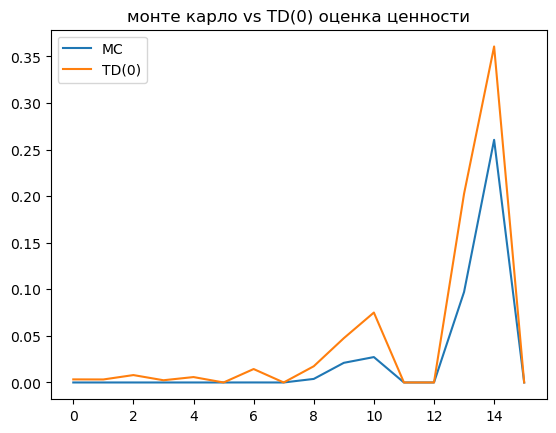

In [7]:
plt.plot(V_mc, label="MC")
plt.plot(V_td, label="TD(0)")
plt.legend()
plt.title("монте карло vs TD(0) оценка ценности")
plt.show()